<a href="https://colab.research.google.com/github/vaniasahdaa/skripsi/blob/main/all_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Module

In [1]:
import pandas as pd
import numpy as np
import string
import re

## Read CSV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
telegram_review = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/telegram_review_labelled.csv')
print(telegram_review)
telegram_review.head()

                     date           userName  rating  \
0     2023-07-31 17:14:15              &-&9-       1   
1      2023-07-31 8:34:34      Rohmatadis354       5   
2      2023-07-31 7:53:11           tiririis       3   
3      2023-07-31 3:23:24             Ova ok       5   
4      2023-07-31 3:22:17  Fransiskus_Solano       5   
...                   ...                ...     ...   
1191  2022-07-01 13:30:32       salsadilagtn       1   
1192  2022-07-01 13:04:25   satriapratama.id       1   
1193   2022-07-01 6:14:14       apesiahhhhhh       3   
1194   2022-07-01 4:47:39      bbxgxgshshsus       1   
1195   2022-07-01 0:59:19     muna darmalena       4   

                                                 review  \
0     jujur sangat kecewa banget pernah download trs...   
1                                             Very good   
2     maaf min mau tanya saya mau log in telegram ta...   
3                                             Very Good   
4                               

,date,userName,rating,review,title,Natan,Grace,Vania,Final
0,2023-07-31 17:14:15,&-&9-,1,jujur sangat kecewa banget pernah download trs...,kecewa,Negatif,Negatif,Negatif,Negatif
1,2023-07-31 8:34:34,Rohmatadis354,5,Very good,Very good,Positif,Positif,Positif,Positif
2,2023-07-31 7:53:11,tiririis,3,maaf min mau tanya saya mau log in telegram ta...,trouble,Negatif,Negatif,Negatif,Negatif
3,2023-07-31 3:23:24,Ova ok,5,Very Good,Evaluation,Positif,Positif,Positif,Positif
4,2023-07-31 3:22:17,Fransiskus_Solano,5,Very good,Telegram,Positif,Positif,Positif,Positif


## Mengurangi Kolom

In [7]:
telegram_review.drop(columns = ['date', 'userName', 'title', 'Natan', 'Grace', 'Vania'], inplace = True)
telegram_review.columns = ['rating', 'review','Final']
telegram_review.head()

,rating,review,Final
0,1,jujur sangat kecewa banget pernah download trs...,Negatif
1,5,Very good,Positif
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif
3,5,Very Good,Positif
4,5,Very good,Positif


In [8]:
review = telegram_review['review']

## Install Library Demoji - Untuk Menghapus Emoji

In [9]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.5 MB/s eta 0:00:00


In [10]:
import demoji
demoji.download_codes()

<ipython-input-10-eb011a9810ad>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


## Case Folding

In [11]:
def case_folding(text):
    #Mengubah uppercase menjadi lowercase
    text = text.lower()
    #Menghilangkan tanda baca
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    #Mempertimbangkan huruf dan angka
    text = re.sub('{^a-zA-Z]', ' ', text)
    #Mengganti line baru dengan spasi
    text = re.sub("\n", " ", text)
    #Menghapus single char
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    #Menghapus symbol
    symbol_pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(symbol_pattern, '', text)
    #Menghapus spasi di awal dan akhir kalimat
    text = text.strip()
    #Menghapus spasi berlebih
    text = re.sub('\s+', ' ', text)
    #Menghapus Emoji
    text = demoji.replace(text, ' ')
    return text

## Menampilkan Data yang Sudah di Case Folding

In [12]:
telegram_review['clean'] = [case_folding(i) for i in review]
review = telegram_review['clean']
telegram_review.head(15)

,rating,review,Final,clean
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...
1,5,Very good,Positif,very good
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...
3,5,Very Good,Positif,very good
4,5,Very good,Positif,very good
5,1,when I try to log in to the same account with ...,Negatif,when try to log in to the same account with my...
6,1,operator lo goblok gabut aja kerja nya gua nun...,Negatif,operator lo goblok gabut aja kerja nya gua nun...
7,1,Kode otp gak pernah masuk di sms😭,Negatif,kode otp gak pernah masuk di sms
8,5,Very good,Positif,very good
9,5,keren abiz🔥,Positif,keren abiz


## Translasi Data

### Install Translator

In [13]:
pip install deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 859.1 kB/s eta 0:00:00


### Translasi

In [14]:
from deep_translator import GoogleTranslator
# Define a function to translate text
def translate_text(text, target_language='id'):
    translated = GoogleTranslator(source='auto', target=target_language).translate(text)
    return translated

### Menampilkan Hasil Translasi

In [15]:
# Apply the translation function to the 'review' column
telegram_review['translated_review'] = telegram_review['clean'].apply(translate_text)
# Print the translated reviews
review = telegram_review['translated_review']

telegram_review.head(15)

,rating,review,Final,clean,translated_review
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa banget pernah download trs...
1,5,Very good,Positif,very good,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...
3,5,Very Good,Positif,very good,sangat bagus
4,5,Very good,Positif,very good,sangat bagus
5,1,when I try to log in to the same account with ...,Negatif,when try to log in to the same account with my...,ketika mencoba masuk ke akun yang sama dengan ...
6,1,operator lo goblok gabut aja kerja nya gua nun...,Negatif,operator lo goblok gabut aja kerja nya gua nun...,operator lo goblok gabut aja kerja nya gua nun...
7,1,Kode otp gak pernah masuk di sms😭,Negatif,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms
8,5,Very good,Positif,very good,sangat bagus
9,5,keren abiz🔥,Positif,keren abiz,keren abiz


## Formalisasi Data

In [18]:
# Membaca dataset dari dua file dataset
dataset = eval(open("/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/combined_slang_words.txt").read())

# Create a regular expression pattern to match keys from the dataset
pattern = re.compile(r'\b(' + '|'.join(dataset.keys()) + r')\b')

#print(pattern)

# Initialize an empty list to store the transformed words
content = telegram_review['translated_review']

# Iterate through each word in the input text
j = 0
for i in content:
    filter_data = pattern.sub(lambda x: dataset[x.group()], i)
    content[j] = filter_data.lower()
    j+=1

# Return the transformed text as a list of words
 #return content

<ipython-input-18-89ab2cdb7b78>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content[j] = filter_data.lower()


In [19]:
print(content)

0       jujur sangat kecewa sekali pernah download ter...
1                                            sangat bagus
2       maaf min mau tanya saya mau log in telegram ta...
3                                            sangat bagus
4                                            sangat bagus
                              ...                        
1191    ga bisa log in karena masalah sama proses veri...
1192    kode verifikasinya waktu mau login sumpah ga j...
1193    selalu connecting pas buka aplikasinya padahal...
1194    kok ga bisa login yya tolong perbaiki kode jug...
1195    saya tidaknsengaja menghapus app telegram sete...
Name: translated_review, Length: 1196, dtype: object


## Menampilkan Hasil Formalisasi

In [20]:
telegram_review['formalized'] = content
# review = telegram_review['formalized']

telegram_review.head(15)

,rating,review,Final,clean,translated_review,formalized
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...
1,5,Very good,Positif,very good,sangat bagus,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus
4,5,Very good,Positif,very good,sangat bagus,sangat bagus
5,1,when I try to log in to the same account with ...,Negatif,when try to log in to the same account with my...,ketika mencoba masuk ke akun yang sama dengan ...,ketika mencoba masuk ke akun yang sama dengan ...
6,1,operator lo goblok gabut aja kerja nya gua nun...,Negatif,operator lo goblok gabut aja kerja nya gua nun...,operator kamu bodoh gabut saja kerja nya saya ...,operator kamu bodoh gabut saja kerja nya saya ...
7,1,Kode otp gak pernah masuk di sms😭,Negatif,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms
8,5,Very good,Positif,very good,sangat bagus,sangat bagus
9,5,keren abiz🔥,Positif,keren abiz,keren banget,keren banget


## Stemming

### Instal Library Sastrawi

In [21]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


### Proses Stemming

In [22]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Initialize the Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Define a function to perform stemming using Sastrawi
def stem_text(text):
    return stemmer.stem(text)

telegram_review['stemmed'] = telegram_review['formalized'].apply(stem_text)
review = telegram_review['stemmed']

### Menampilkan Hasil Stemming

In [23]:
telegram_review.head(15)

,rating,review,Final,clean,translated_review,formalized,stemmed
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus
5,1,when I try to log in to the same account with ...,Negatif,when try to log in to the same account with my...,ketika mencoba masuk ke akun yang sama dengan ...,ketika mencoba masuk ke akun yang sama dengan ...,ketika coba masuk ke akun yang sama dengan per...
6,1,operator lo goblok gabut aja kerja nya gua nun...,Negatif,operator lo goblok gabut aja kerja nya gua nun...,operator kamu bodoh gabut saja kerja nya saya ...,operator kamu bodoh gabut saja kerja nya saya ...,operator kamu bodoh gabut saja kerja nya saya ...
7,1,Kode otp gak pernah masuk di sms😭,Negatif,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms
8,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus
9,5,keren abiz🔥,Positif,keren abiz,keren banget,keren banget,keren banget


## Stopword

### Install NTLK

In [24]:
pip install --user -U nltk

In [26]:
import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
#nltk.download('stopwords')
daftar_remove = stopwords.words('indonesian')

### Proses Stopword

In [31]:
data_neg = open('/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/negative.txt', 'r')
neg = data_neg.read()

data_pos = open('/content/drive/My Drive/Colab Notebooks/Coding/Preprocessing/positive.txt', 'r')
pos = data_pos.read()

data_pos_neg = pos + neg
list_pos_neg = data_pos_neg.split('\n')

final_list = list(set(daftar_remove) - set(list_pos_neg))

stopword = telegram_review['stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_list)]))

### Menampilkan Hasil Stopword

In [32]:
telegram_review['stopword'] = stopword
review = telegram_review['stopword']

telegram_review.head(15)

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa download download kerja ki...
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min log in telegram code accesnya tidak k...
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
5,1,when I try to log in to the same account with ...,Negatif,when try to log in to the same account with my...,ketika mencoba masuk ke akun yang sama dengan ...,ketika mencoba masuk ke akun yang sama dengan ...,ketika coba masuk ke akun yang sama dengan per...,coba masuk akun perangkat kode verifikasi kiri...
6,1,operator lo goblok gabut aja kerja nya gua nun...,Negatif,operator lo goblok gabut aja kerja nya gua nun...,operator kamu bodoh gabut saja kerja nya saya ...,operator kamu bodoh gabut saja kerja nya saya ...,operator kamu bodoh gabut saja kerja nya saya ...,operator bodoh gabut kerja nya nungguin verif ...
7,1,Kode otp gak pernah masuk di sms😭,Negatif,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak masuk sms
8,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
9,5,keren abiz🔥,Positif,keren abiz,keren banget,keren banget,keren banget,keren banget


## Tokenizing

In [53]:
telegram_review.to_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/telegram_review_preprocessed.csv', header=True, index=False)

## Menampilkan hasil tokenizing

In [54]:
def tokenizing(text):
    words_token = text.split()
    return words_token

In [55]:
telegram_review['token'] = [tokenizing(i) for i in review]
review = telegram_review['token']
telegram_review.head(15)

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword,skor,label,token
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa download download kerja ki...,0,neutral,"[jujur, sangat, kecewa, download, download, ke..."
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,0,neutral,"[sangat, bagus]"
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min log in telegram code accesnya tidak k...,0,neutral,"[maaf, min, log, in, telegram, code, accesnya,..."
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,0,neutral,"[sangat, bagus]"
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,0,neutral,"[sangat, bagus]"
5,1,when I try to log in to the same account with ...,Negatif,when try to log in to the same account with my...,ketika mencoba masuk ke akun yang sama dengan ...,ketika mencoba masuk ke akun yang sama dengan ...,ketika coba masuk ke akun yang sama dengan per...,coba masuk akun perangkat kode verifikasi kiri...,0,neutral,"[coba, masuk, akun, perangkat, kode, verifikas..."
6,1,operator lo goblok gabut aja kerja nya gua nun...,Negatif,operator lo goblok gabut aja kerja nya gua nun...,operator kamu bodoh gabut saja kerja nya saya ...,operator kamu bodoh gabut saja kerja nya saya ...,operator kamu bodoh gabut saja kerja nya saya ...,operator bodoh gabut kerja nya nungguin verif ...,0,neutral,"[operator, bodoh, gabut, kerja, nya, nungguin,..."
7,1,Kode otp gak pernah masuk di sms😭,Negatif,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak masuk sms,0,neutral,"[kode, otp, gak, masuk, sms]"
8,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,0,neutral,"[sangat, bagus]"
9,5,keren abiz🔥,Positif,keren abiz,keren banget,keren banget,keren banget,keren banget,0,neutral,"[keren, banget]"


In [66]:
telegram_review.drop(columns = ['label', 'skor'], inplace = True)
telegram_review.head()

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword,token
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa download download kerja ki...,"[jujur, sangat, kecewa, download, download, ke..."
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]"
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min log in telegram code accesnya tidak k...,"[maaf, min, log, in, telegram, code, accesnya,..."
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]"
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]"


# InSet Lexicon

In [67]:
pos_lexicon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/positive_inSet.csv')
pos_lex = dict([(i,j) for i,j in zip(pos_lexicon[' word'], pos_lexicon['weight'])])

neg_lexicon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/negative_inSet.csv')
neg_lex = dict([(i,j) for i,j in zip(neg_lexicon[' word'], neg_lexicon['weight'])])

In [68]:
def sentiment_lexicon(text):
  skor = 0
  for word in text:
      if (word in pos_lex):
        skor = skor + pos_lex[word]
      elif (word in neg_lex):
        skor = skor + neg_lex[word]
  polarity=''
  if (skor > 0):
      polarity = 'Positif'
  else:
      polarity = 'Negatif'
  return skor, polarity

In [69]:
results = telegram_review['token'].apply(sentiment_lexicon)
results = list(zip(*results))

telegram_review['skor'] = results[0]
telegram_review['label'] = results[1]
print(telegram_review['label'].value_counts()), telegram_review.shape

Negatif    746
Positif    450
Name: label, dtype: int64


(None, (1196, 11))

In [70]:
telegram_review

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword,token,skor,label
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa download download kerja ki...,"[jujur, sangat, kecewa, download, download, ke...",21,Positif
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]",5,Positif
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min log in telegram code accesnya tidak k...,"[maaf, min, log, in, telegram, code, accesnya,...",4,Positif
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]",5,Positif
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]",5,Positif
...,...,...,...,...,...,...,...,...,...,...,...
1191,1,ga bisa log in krn masalah sama proses verifik...,Negatif,ga bisa log in krn masalah sama proses verifik...,ga bisa log in karena masalah sama proses veri...,ga bisa log in karena masalah sama proses veri...,ga bisa log in karena masalah sama proses veri...,ga log in masalah proses verifikssi sm,"[ga, log, in, masalah, proses, verifikssi, sm]",-3,Negatif
1192,1,Kode verifikasinya waktu mau login sumpah ga j...,Negatif,kode verifikasinya waktu mau login sumpah ga j...,kode verifikasinya waktu mau login sumpah ga j...,kode verifikasinya waktu mau login sumpah ga j...,kode verifikasi waktu mau login sumpah ga jela...,kode verifikasi login sumpah ga jelas ga muncul,"[kode, verifikasi, login, sumpah, ga, jelas, g...",2,Positif
1193,3,Selalu connecting pas buka aplikasinya padahal...,Negatif,selalu connecting pas buka aplikasinya padahal...,selalu connecting pas buka aplikasinya padahal...,selalu connecting pas buka aplikasinya padahal...,selalu connecting pas buka aplikasi padahal in...,connecting pas buka aplikasi internetnya lancar,"[connecting, pas, buka, aplikasi, internetnya,...",6,Positif
1194,1,Kok ga bisa login yya?? Tolong perbaiki🙏🏻\nkod...,Negatif,kok ga bisa login yya tolong perbaiki kode jug...,kok ga bisa login yya tolong perbaiki kode jug...,kok ga bisa login yya tolong perbaiki kode jug...,kok ga bisa login yya tolong baik kode juga ga...,ga login yya tolong baik kode ga muncul downlo...,"[ga, login, yya, tolong, baik, kode, ga, muncu...",7,Positif


In [71]:
telegram_review.to_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/telegram_review_inSetLexicon', index = False, header = True)

# Oversampling - SMOTE

## Install Library

In [112]:
pip install -U imbalanced-learn

In [113]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/telegram_review_preprocessed.csv')
df.drop(columns = ['label', 'skor'], inplace = True)
df.head(15)

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa download download kerja ki...
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min log in telegram code accesnya tidak k...
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
5,1,when I try to log in to the same account with ...,Negatif,when try to log in to the same account with my...,ketika mencoba masuk ke akun yang sama dengan ...,ketika mencoba masuk ke akun yang sama dengan ...,ketika coba masuk ke akun yang sama dengan per...,coba masuk akun perangkat kode verifikasi kiri...
6,1,operator lo goblok gabut aja kerja nya gua nun...,Negatif,operator lo goblok gabut aja kerja nya gua nun...,operator kamu bodoh gabut saja kerja nya saya ...,operator kamu bodoh gabut saja kerja nya saya ...,operator kamu bodoh gabut saja kerja nya saya ...,operator bodoh gabut kerja nya nungguin verif ...
7,1,Kode otp gak pernah masuk di sms😭,Negatif,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak masuk sms
8,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
9,5,keren abiz🔥,Positif,keren abiz,keren banget,keren banget,keren banget,keren banget


## Proses Oversampling

In [114]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding/Preprocessing/telegram_review_preprocessed.csv')
dataset.drop(columns = ['label', 'skor'], inplace = True)
dataset.head(15)

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword
0,1,jujur sangat kecewa banget pernah download trs...,Negatif,jujur sangat kecewa banget pernah download trs...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa sekali pernah download ter...,jujur sangat kecewa download download kerja ki...
1,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
2,3,maaf min mau tanya saya mau log in telegram ta...,Negatif,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min mau tanya saya mau log in telegram ta...,maaf min log in telegram code accesnya tidak k...
3,5,Very Good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
4,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
5,1,when I try to log in to the same account with ...,Negatif,when try to log in to the same account with my...,ketika mencoba masuk ke akun yang sama dengan ...,ketika mencoba masuk ke akun yang sama dengan ...,ketika coba masuk ke akun yang sama dengan per...,coba masuk akun perangkat kode verifikasi kiri...
6,1,operator lo goblok gabut aja kerja nya gua nun...,Negatif,operator lo goblok gabut aja kerja nya gua nun...,operator kamu bodoh gabut saja kerja nya saya ...,operator kamu bodoh gabut saja kerja nya saya ...,operator kamu bodoh gabut saja kerja nya saya ...,operator bodoh gabut kerja nya nungguin verif ...
7,1,Kode otp gak pernah masuk di sms😭,Negatif,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak pernah masuk di sms,kode otp gak masuk sms
8,5,Very good,Positif,very good,sangat bagus,sangat bagus,sangat bagus,sangat bagus
9,5,keren abiz🔥,Positif,keren abiz,keren banget,keren banget,keren banget,keren banget


In [153]:
nump_positif = np.array([1])
nump_negatif = np.array([0])

for i in dataset['Final'].index:
  if dataset['Final'][i] == 'Positif':
    dataset['Final'][i] = nump_positif
  elif dataset['Final'][i] == 'Negatif':
    dataset['Final'][i] = nump_negatif

dataset

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword
0,1,862,0,425,386,386,402,426
1,5,651,1,1052,727,727,730,694
2,3,946,0,621,601,601,610,564
3,5,649,1,1052,727,727,730,694
4,5,651,1,1052,727,727,730,694
...,...,...,...,...,...,...,...,...
1191,1,781,0,237,231,231,237,272
1192,1,342,0,565,551,551,564,497
1193,3,491,0,793,781,781,781,220
1194,1,346,0,579,565,565,573,283


#### Mengubah isi tabel ke angka

In [161]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [162]:
dataset['review'] = encode.fit_transform(df['review'].values)
dataset['clean'] = encode.fit_transform(df['clean'].values)
dataset['translated_review'] = encode.fit_transform(df['translated_review'].values)
dataset['formalized'] = encode.fit_transform(df['formalized'].values)
dataset['stemmed'] = encode.fit_transform(df['stemmed'].values)
dataset['stopword'] = encode.fit_transform(df['stopword'].values)
dataset['Final'] = encode.fit_transform(df['Final'])

In [165]:
dataset

,rating,review,Final,clean,translated_review,formalized,stemmed,stopword
0,1,862,0,425,386,386,402,426
1,5,651,1,1052,727,727,730,694
2,3,946,0,621,601,601,610,564
3,5,649,1,1052,727,727,730,694
4,5,651,1,1052,727,727,730,694
...,...,...,...,...,...,...,...,...
1191,1,781,0,237,231,231,237,272
1192,1,342,0,565,551,551,564,497
1193,3,491,0,793,781,781,781,220
1194,1,346,0,579,565,565,573,283


In [166]:
type(dataset['Final'][0])

numpy.int64

In [167]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
x = dataset.drop('Final', axis=1)
y = dataset['Final']


In [168]:
# Before SMOTE
print(x.shape)
print(y.shape)

(1196, 7)
(1196,)


In [169]:
# Instantiate the SMOTE algorithm
smote = SMOTE(random_state=30)
# Perform oversampling
x_resampled, y_resampled = smote.fit_resample(x,y)

In [170]:
print(x_resampled.shape)
print(y_resampled.shape)

(2056, 7)
(2056,)


In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

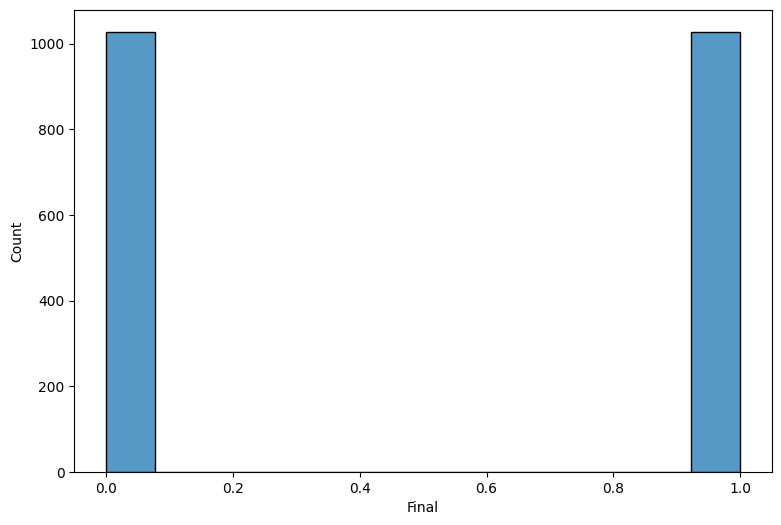

In [177]:
fig = plt.subplots(figsize=(9, 6))
sns.histplot(data=y_resampled)
plt.show()

In [204]:
x_resampled['Final'] = y_resampled
dataset_resampled = x_resampled
dataset_resampled

,rating,review,clean,translated_review,formalized,stemmed,stopword,Final
0,1,862,425,386,386,402,426,0
1,5,651,1052,727,727,730,694,1
2,3,946,621,601,601,610,564,0
3,5,649,1052,727,727,730,694,1
4,5,651,1052,727,727,730,694,1
...,...,...,...,...,...,...,...,...
2051,5,651,1052,727,727,730,694,1
2052,4,907,522,511,511,525,453,1
2053,5,651,1052,727,727,730,694,1
2054,5,47,95,78,78,80,79,1


In [207]:
dataset_resampled

,rating,review,clean,translated_review,formalized,stemmed,stopword,Final
0,1,862,425,386,386,402,426,0
1,5,651,1052,727,727,730,694,1
2,3,946,621,601,601,610,564,0
3,5,649,1052,727,727,730,694,1
4,5,651,1052,727,727,730,694,1
...,...,...,...,...,...,...,...,...
2051,5,651,1052,727,727,730,694,1
2052,4,907,522,511,511,525,453,1
2053,5,651,1052,727,727,730,694,1
2054,5,47,95,78,78,80,79,1


# Split Data Training and Data Testing

In [208]:
from sklearn.model_selection import train_test_split

x_resampled_features = dataset_resampled.drop('Final', axis=1)
y_resampled_target = dataset_resampled['Final']

# Split the data into training and testing sets (adjust test_size as needed)
x_train, x_test, y_train, y_test = train_test_split(x_resampled_features, y_resampled_target, test_size=0.2, random_state=30)

# X_train and y_train are your training data and labels
# X_test and y_test are your testing data and labels


In [209]:
print(len(x_train))
print(len(x_test))

1644
412
